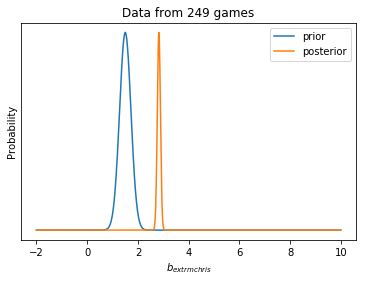

In [19]:
from pylab import *
import numpy
from scipy.stats import norm

x = arange(-2,10,0.01)
prior = norm(1.5,1/sqrt(20)).pdf(x)

N = 250
data = norm(3,1).rvs(N)

for i in range(1,N):
    clf()
    if (i == 0):
        posterior = prior.copy()
    else:
        posterior = prior * norm(data[0:i].mean(),1.0/sqrt(i)).pdf(x)
    title("Data from " + str(i) + " games")
    plot(x, prior / prior.max(), label="prior")
    plot(x, posterior / posterior.max(), label="posterior")
    xlabel("$ b_{\textrm{chris}} $")
    ylabel("Probability")
    yticks([])
    legend()
    savefig("img" + str(i).rjust(3,'0') + ".png")

In [106]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = [14,6]

(array([[1.26291333]]), array([0.55056625]))

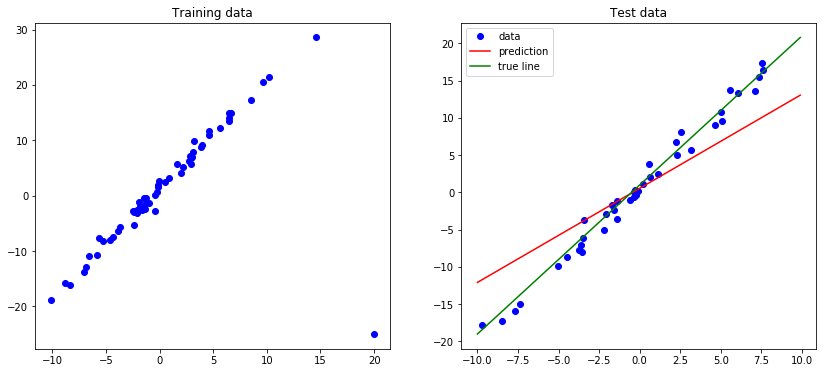

In [111]:
from sklearn.linear_model import *

N = 100

x = norm(0,5).rvs((N,1))
y = 2*x + norm(0,1).rvs((N,1)) + 1
x[20] = 20
y[20] = -25
#x[21] = -20
#y[21] = 20

lr = LinearRegression(fit_intercept=True)

k = 60

lr.fit(x[0:k], y[0:k])

subplot(121)
title("Training data")
plot(x[0:k], y[0:k], 'bo')
subplot(122)
title("Test data")
plot(x[k:], y[k:], 'bo', label='data')
tt = arange(-10,10,0.1)
plot(tt, lr.intercept_[0] + lr.coef_[0,0]*tt, 'r', label='prediction')
plot(tt, 1 + 2*tt, 'g', label='true line')
legend()

lr.coef_, lr.intercept_

In [154]:
from sklearn.linear_model import *

N = 100

x = numpy.zeros(shape=(N,3), dtype=float)
x[:,0:2] = norm(0,5).rvs((N,2))
x[:,2] = x[:,0] + x[:,1] + norm(0,0.00001).rvs(N)
y = 2*x[:,0]+3*x[:,1] + norm(0,1).rvs(N) + 1

lr = LinearRegression(fit_intercept=True)

k = 60

lr.fit(x[0:k], y[0:k])

lr.coef_, lr.intercept_

(array([-13798.66142117, -13797.71468149,  13800.68869771]),
 0.9746909142192655)